<a href="https://colab.research.google.com/github/ramzesssina/ML---labi/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

МЛ практика 6. Обучение без учителя
Цель занятия:
Изучить методы обучения без учителя, познакомиться с алгоритмами кластеризации, понять их применение и реализовать модели кластеризации с использованием различных алгоритмов.

Задание состоит из следующих частей:
Определение обучения без учителя
Разбор алгоритмов DBSSCAN, K-means
Метрики качества кластеризации
Пример полезных задач, которые решает кластеризация
P.S. Некоторые вещи (например PCA, обработка текстовых данных) мы пройдем чуть позже.

Задачи для домашки ⏰
Преобразовать датасет
Построить кластеры
Описать результат полученных кластеров (для K-Means и DBSSCAN)
Объяснить метрики качества
По желанию

Спарсить данные по статьям (например lenta.ru или naked-science.ru)
Преобразовать текста статьи (по принципу описанному в последнем пункте)
Оценить метрики качества, провести аналитику кластеров (можно не максимально подробно, если получилось слишком много кластеров)

# **Предобработка (все по классике)**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/nba.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [36]:
# Создаем копию данных
category_columns: list[str] = df.select_dtypes(include=['object']).columns # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

In [34]:
df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,Name_Willie Cauley-Stein,Name_Willie Green,Name_Willie Reed,Name_Willie White,Name_Wilson Chandler,Name_Winston Bennett,Name_Winston Garland,Name_Xavier McDaniel,Name_Zach LaVine,Name_Zach Randolph
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,...,False,False,False,False,False,False,False,False,False,False
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,...,False,False,False,False,False,False,False,False,False,False
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,...,False,False,False,False,False,False,False,False,False,False
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,...,False,False,False,False,False,False,False,False,False,False
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,...,False,False,False,False,False,False,False,False,False,False
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,...,False,False,False,False,False,False,False,False,False,False
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,...,False,False,False,False,False,False,False,False,False,False


In [39]:
from sklearn.preprocessing import MinMaxScaler
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [38]:
df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,Name_Willie Cauley-Stein,Name_Willie Green,Name_Willie Reed,Name_Willie White,Name_Wilson Chandler,Name_Winston Bennett,Name_Winston Garland,Name_Xavier McDaniel,Name_Zach LaVine,Name_Zach Randolph
0,0.352113,0.642857,0.243636,0.232323,0.357895,0.218437,0.217391,0.323077,0.250,0.207792,...,False,False,False,False,False,False,False,False,False,False
1,0.338028,0.629630,0.236364,0.171717,0.310526,0.116232,0.304348,0.430769,0.235,0.337662,...,False,False,False,False,False,False,False,False,False,False
2,0.887324,0.322751,0.163636,0.171717,0.205263,0.368737,0.173913,0.261538,0.244,0.116883,...,False,False,False,False,False,False,False,False,False,False
3,0.661972,0.224868,0.181818,0.202020,0.247368,0.376754,0.043478,0.076923,0.226,0.116883,...,False,False,False,False,False,False,False,False,False,False
4,0.521127,0.222222,0.138182,0.131313,0.115789,0.573146,0.000000,0.015385,0.000,0.168831,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0.971831,0.335979,0.130909,0.131313,0.147368,0.390782,0.000000,0.030769,0.143,0.155844,...,False,False,False,False,False,False,False,False,False,False
1336,0.802817,0.251323,0.116364,0.121212,0.173684,0.240481,0.043478,0.107692,0.167,0.103896,...,False,False,False,False,False,False,False,False,False,False
1337,0.450704,0.238095,0.170909,0.191919,0.163158,0.625251,0.000000,0.000000,0.000,0.129870,...,False,False,False,False,False,False,False,False,False,False
1338,0.577465,0.235450,0.138182,0.141414,0.157895,0.402806,0.000000,0.030769,0.100,0.155844,...,False,False,False,False,False,False,False,False,False,False


In [40]:
columns_to_drop = [col for col in df.columns if 'Name' in col]
df = df.drop(columns=columns_to_drop)

In [41]:
df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,0.352113,0.642857,0.243636,0.232323,0.357895,0.218437,0.217391,0.323077,0.250,0.207792,0.225490,0.699,0.132075,0.340426,0.279412,0.179245,0.16,0.102564,0.279070,0.0
1,0.338028,0.629630,0.236364,0.171717,0.310526,0.116232,0.304348,0.430769,0.235,0.337662,0.333333,0.765,0.094340,0.191489,0.154412,0.349057,0.44,0.128205,0.348837,0.0
2,0.887324,0.322751,0.163636,0.171717,0.205263,0.368737,0.173913,0.261538,0.244,0.116883,0.127451,0.670,0.094340,0.159574,0.139706,0.094340,0.20,0.076923,0.209302,0.0
3,0.661972,0.224868,0.181818,0.202020,0.247368,0.376754,0.043478,0.076923,0.226,0.116883,0.127451,0.689,0.188679,0.074468,0.117647,0.075472,0.24,0.025641,0.209302,1.0
4,0.521127,0.222222,0.138182,0.131313,0.115789,0.573146,0.000000,0.015385,0.000,0.168831,0.186275,0.674,0.188679,0.138298,0.161765,0.028302,0.12,0.102564,0.162791,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0.971831,0.335979,0.130909,0.131313,0.147368,0.390782,0.000000,0.030769,0.143,0.155844,0.147059,0.792,0.075472,0.063830,0.066176,0.235849,0.24,0.051282,0.162791,0.0
1336,0.802817,0.251323,0.116364,0.121212,0.173684,0.240481,0.043478,0.107692,0.167,0.103896,0.098039,0.794,0.075472,0.095745,0.088235,0.216981,0.32,0.000000,0.279070,1.0
1337,0.450704,0.238095,0.170909,0.191919,0.163158,0.625251,0.000000,0.000000,0.000,0.129870,0.156863,0.643,0.283019,0.223404,0.257353,0.028302,0.12,0.102564,0.186047,0.0
1338,0.577465,0.235450,0.138182,0.141414,0.157895,0.402806,0.000000,0.030769,0.100,0.155844,0.176471,0.625,0.037736,0.021277,0.029412,0.207547,0.16,0.025641,0.162791,1.0


# **K-means**

In [42]:
! pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.0 MB/s eta 0:00:00


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):

    # преобразуем X в numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X, centroids, labels, step)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

# Берем датасет и визуализируем K-means
interactive_kmeans_visualization(df[:100])

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

# **K-means через реализацию skelarn**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 3  # Вы можете изменить это значение в соответствии с вашими данными

df = df.dropna()

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = df.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")

Статистика по кластерам:

Статистика для признака 'GP':
             mean       std       min  max
Cluster                                   
0        0.897833  0.137177  0.239437  1.0
1        0.694224  0.220465  0.070423  1.0
2        0.562110  0.237046  0.000000  1.0

Статистика для признака 'MIN':
             mean       std       min       max
Cluster                                        
0        0.681520  0.137494  0.343915  1.000000
1        0.294258  0.126267  0.034392  0.634921
2        0.281518  0.156325  0.000000  0.775132

Статистика для признака 'PTS':
             mean       std       min       max
Cluster                                        
0        0.438110  0.145683  0.167273  1.000000
1        0.157842  0.070374  0.010909  0.338182
2        0.146267  0.088597  0.000000  0.476364

Статистика для признака 'FGM':
             mean       std       min       max
Cluster                                        
0        0.465789  0.155625  0.171717  1.000000
1        

# **Анализ кластеров**

1 'GP' - Количество очков набранных за игры


*   Кластер 0 имеет самое большое количество очков, набранных за игры ( mean = 0.897833)
*   Кластер 1 стоит между кластером 0 и 2 (mean = 0.694224)
*   Кластер 2 имеет самое маленькое значение (mean = 0.562110)

Это говорит о том, что игроки, которые набирают максимальное кол-во очков за матч, находятся в Кластере 0, те кто набирают самое малое количество очков, в кластере 2. Ну и средние количество в Кластере 1



2 'MIN' - Количество минут проведенных на поле.

*   В Кластере 0 находятся игроки, которые проводят на поле больше всего минут ( mean = 0.681520 ). В то время, как в Кластере 1 и 2 в разы меньше времени. (mean = 0.294258 ) ( mean = 0.281518 )

Это говорит, что игроки, которые находятся в Кластере 0, проводят в разы больше времени на поле, чем игроки, которые находятся в Кластерах 1 и 2.



3 '3PA' - Количество бросков с трёхочковой зоны


*   Также как и в предыдущих примерах, игроки в Кластере 0 - самые лучшие, самый большой процент бросков ( mean = 0.228297 ), в то время, как в Кластерах 1 и 2, игроки в разы меньше совершают броски с 3-х очковой зоны ( mean = 0.170833) ( mean = 0.192918)
*   Но хаметно, что игроки в Кластере 2 ( mean = 0.192918 ) совершают больше трёхочковых бросков, нежели игроки с Кластера 1. ( mean = 0.170833)

Это говорит, что игроки, которые находятся в Кластере 0, совершают броски с 3-х очковой зоны, чем игроки, которые находятся в Кластерах 1 и 2.



**Коэффициент силуэта для ( k=3 ): 0.3505**

Коэффициент силуэта — это метрика для оценки качества кластеризации, показывающая, насколько объекты внутри одного кластера похожи друг на друга и отличаются от объектов в других кластерах.

Диапазон значений: от -1 до 1.
Близкие к 1: Хорошая кластеризация; объекты внутри кластеров схожи, кластеры хорошо разделены.
Около 0: Кластеры пересекаются; объекты находятся на границах кластеров.
Отрицательные значения: Плохая кластеризация; объекты могут быть отнесены к неправильным кластерам.
Интерпретация полученного значения:

0.3505 — это положительное значение, указывающее на удовлетворительное качество кластеризации.
Кластеры достаточно хорошо разделены, но есть пересечение между ними.
Кластеризация позволила выделить группы вин, отличающиеся по типу (белое или красное), содержанию алкоголя и уровню остаточного сахара.

# **DBSSCAN**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, основанный на плотности точек в пространстве.

Параметры алгоритма:

Epsilon (eps): радиус окрестности точки.
Min_samples: минимальное количество точек в eps-окрестности для того, чтобы точка считалась ядром кластера.
Классификация точек:

Core point (ядро): если в eps-окрестности точки находится не менее min_samples точек, то она является ядром.
Border point (граничная точка): точка, которая находится в eps-окрестности ядра, но сама не является ядром.
Noise point (шум): точка, которая не является ни ядром, ни граничной точкой. (входит в кластер -1)
Точки, которые связаны по плотности (через ядра и их eps-окрестности), объединяются в один кластер.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])


Output()

# **DBSSCAN через sklearn**

Количество кластеров: 2
Статистика по кластерам:

Статистика для признака 'GP':
             mean       std       min  max  count
Cluster                                          
0        0.567002  0.236762  0.000000  1.0    490
1        0.770111  0.217427  0.070423  1.0    804

Статистика для признака 'MIN':
             mean       std       min       max  count
Cluster                                               
0        0.285515  0.160027  0.026455  0.804233    490
1        0.431247  0.221748  0.034392  0.968254    804

Статистика для признака 'PTS':
             mean       std       min       max  count
Cluster                                               
0        0.150078  0.095587  0.000000  0.567273    490
1        0.254324  0.158952  0.010909  0.774545    804

Статистика для признака 'FGM':
             mean       std       min       max  count
Cluster                                               
0        0.157246  0.101934  0.000000  0.626263    490
1        0.270629  

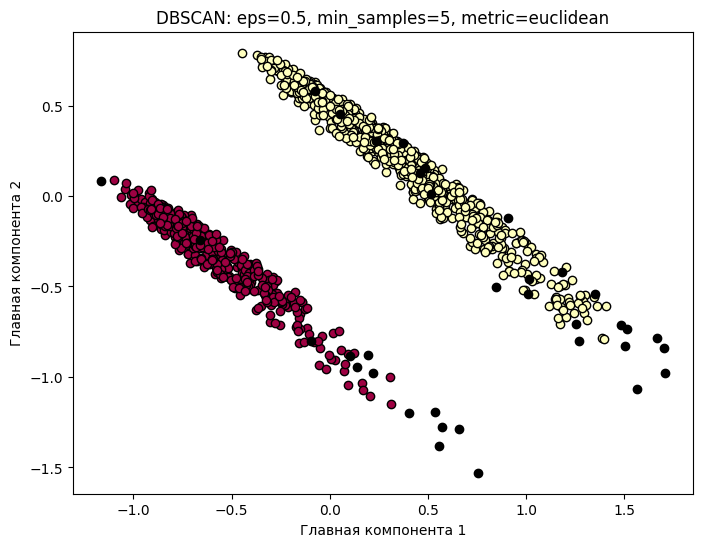

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.5
min_samples = 5
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

TARGET_5Yrs - ( так особо и не разобрался, что в этом столбце, возмонжо игроки, которые играют за эту команду минимум от 5 лет ) ((пусть будет так))



* Кластер 0 состоит исключительно из молодых игроков за клуб (значение mean = 0.0).
* Кластер 1 состоит исключительно из бывалых игроков за клуб (значение mean = 1.0).

'GP' - Количество очков за матчи:

В Кластере 0 игроки набирают меньше очков за игры (mean = 0.567002), чем игроки в Кластере 1 (mean = 0.770111)

'MIN' - количество проведенных минут на поле

В Кластере 0 игроки проводят меньше минут на поле (mean = 0.285515), чем игроки в Кластере 1 (mean = 0.431247)

Коэффициент силуэта для DBSCAN: 0.3906

Общее заключение:

Алгоритм DBSCAN успешно разделил игроков на два кластера, при этом выявив существенные различия в количество очков за игру и процентом совершенных бросков.


# Метрики качества кластеризации

Дополнительные метрики для оценки качества кластеризации

Кроме коэффициента силуэта, существуют и другие метрики, которые помогают оценить качество кластеризации. Вот некоторые из них:

Индекс Калински-Харабаза (Calinski-Harabasz Index):

Описание: Измеряет отношение между разбросом между кластерами и разбросом внутри кластеров.
Диапазон значений: От 0 до бесконечности.
Интерпретация: Чем ближе к бесконечности больше, тем лучше раздленеие между кластерами
Индекс Дэвиса-Болдина (Davies-Bouldin Index):

Описание: Оценивает среднее "сходство" между каждым кластером и наиболее похожим на него другим кластером. Сходство основано на расстоянии между кластерами и их размером.
Диапазон значений: От 0 до бесконечности.
Интерпретация: Чем ближе к 0, тем лучшее разделение между кластерами.
Коэффициент силуэта (Silhouette Score):

Описание: Измеряет, насколько объект похож на свой кластер по сравнению с другими кластерами.
Диапазон значений: От -1 до 1.
Интерпретация: Значения, близкие к 1, указывают на хорошую кластеризацию. Значения около 0 означают, что кластеры перекрываются. Отрицательные значения указывают на возможные ошибки в кластеризации.

In [50]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Кластеризация K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")


Индекс Калински-Харабаза для K-means: 796.0154
Индекс Дэвиса-Болдина для K-means: 1.1749
Коэффициент силуэта для K-means: 0.3505


In [51]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")

Индекс Калински-Харабаза для DBSCAN: 864.2559
Индекс Дэвиса-Болдина для DBSCAN: 1.0644
Коэффициент силуэта для DBSCAN: 0.3906


# **Визуальный пример**

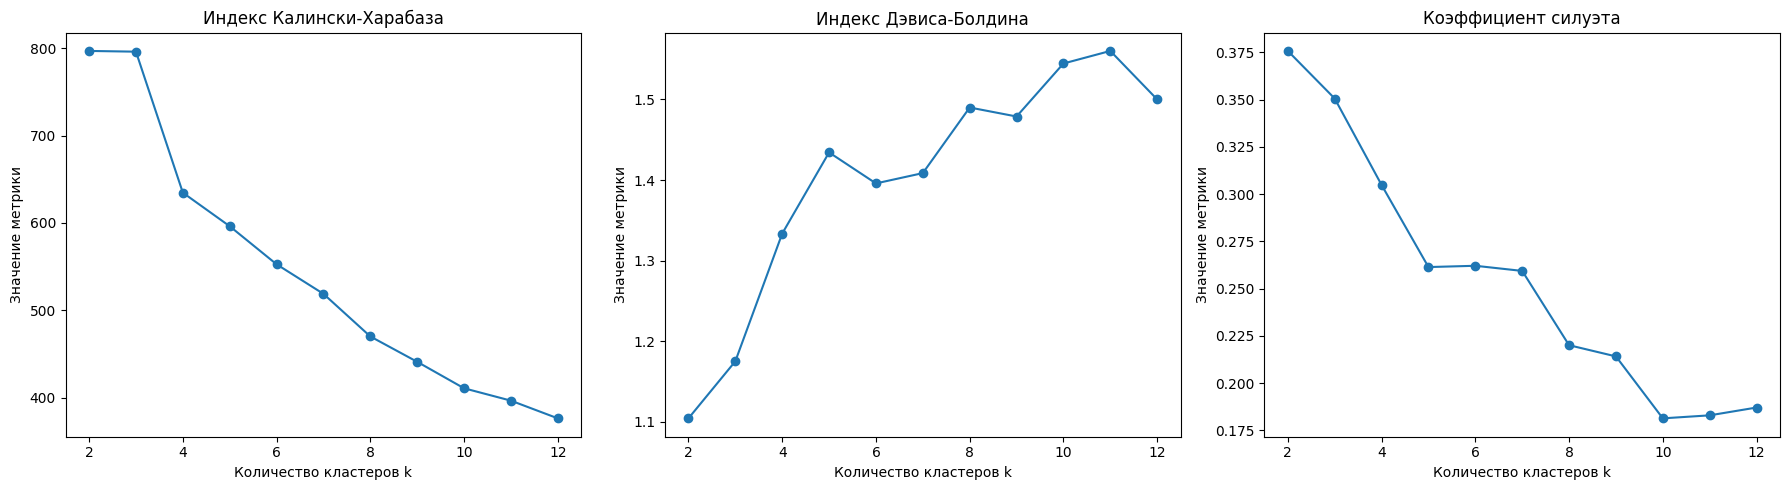

In [52]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()

# **Пример обработки текстовых данных**

In [53]:
pip install nltk pymorphy2 scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 31.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=fb0f109823b7e526ec34fa26558672dc0b3c05569adf11d58c10b0fbc47c2c97
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [54]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Инициализация текстовых анализаторов

In [68]:
pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 33.0 MB/s eta 0:00:00


In [306]:
import pymorphy3
from nltk.corpus import stopwords

morph = pymorphy3.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

with open('/content/dubl.txt', 'r', encoding='utf-8') as f:
    content = f.read()


content = content.replace('\n\n', '='*50)
content = content.replace('\n\n\n', '='*50)
content = content.replace('\n\n\n\n', '='*50)

articles_raw = content.split('='*50)
titles = []
texts = []

for article in articles_raw:
    lines = article.strip().split('\n')
    if len(lines) >= 2:
        # Извлекаем заголовок и текст статьи
        title = lines[0]
        text = ' '.join(lines[1:])
        titles.append(title)
        texts.append(text)

In [309]:
titles[:2]

['Спецпосланник ООН по Сирии – о возможностях и угрозах для переходного процесса в стране',
 'ООН объявила лауреатов премии «Чемпионы Земли» за 2024 год']

In [310]:
texts[:2]

['Спустя двое суток после того, как оппозиционные силы, включая «Хайят Тахрир аш-Шам» (ХТШ), вошли в Дамаск и свергли президента Башара Асада, главный переговорщик ООН, отвечающий за содействие народу Сирии в создании мирного и демократического будущего, подчеркнул, что ничего нельзя воспринимать как должное.',
 'Программа ООН по окружающей среде (ЮНЕП) объявила во вторник имена шести лауреатов премии «Чемпионы Земли» за 2024 год. Лауреаты были отмечены за «выдающееся лидерство, смелые действия и устойчивые решения» в борьбе с деградацией земель, засухой и опустыниванием.']

# Предварительная обработка текстовых данных
* преобразуем в lowercase
* оставляем только слова
* токенизируем текста
* преобразуем слова в начальную форму

In [311]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [312]:
def preprocess_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию и цифры
    text = re.sub(r'[^а-яё\s]', '', text)
    # Токенизация
    words = text.split()
    # Удаление стоп-слов и лемматизация
    lemmatized = []
    for word in words:
        if word not in russian_stopwords:
            lemma = morph.parse(word)[0].normal_form
            lemmatized.append(lemma)
    return ' '.join(lemmatized)

# Применяем предобработку к каждому тексту
texts_preprocessed = [preprocess_text(text) for text in texts]

In [313]:
texts_preprocessed[:2]

['спустя двое сутки оппозиционный сила включая хайят тахрир ашша хтш войти дамаск свергнуть президент башар асад главный переговорщик оон отвечать содействие народ сирия создание мирный демократический будущее подчеркнуть воспринимать должное',
 'программа оон окружающий среда юнеп объявить вторник имя шесть лауреат премия чемпион земля год лауреат отметить выдающийся лидерство смелый действие устойчивый решение борьба деградация земля засуха опустынивание']

# Преобразуем в векторный вид

In [314]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_preprocessed)

In [315]:
# Параметры DBSCAN могут требовать подбора
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
labels = dbscan.fit_predict(X)

In [316]:
# Создаем DataFrame с заголовками и метками кластеров
df = pd.DataFrame({'title': titles, 'label': labels})

# Выводим количество кластеров
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print(f'Количество кластеров: {n_clusters}')

# Анализируем кластеры
for label in unique_labels:
    if label == -1:
        continue  # Пропускаем шум
    cluster_titles = df[df['label'] == label]['title'].head(3)
    print(f'\nКластер {label}:')
    for title in cluster_titles:
        print(f'- {title}')

Количество кластеров: 223

Кластер 0:
- Спецпосланник ООН по Сирии – о возможностях и угрозах для переходного процесса в стране
- Главные события в ООН и мире за неделю
- Спецпосланник ООН по Сирии – о возможностях и угрозах для переходного процесса в стране

Кластер 1:
- ООН объявила лауреатов премии «Чемпионы Земли» за 2024 год
- ООН объявила лауреатов премии «Чемпионы Земли» за 2024 год
- ООН объявила лауреатов премии «Чемпионы Земли» за 2024 год

Кластер 2:
- ИНТЕРВЬЮ | Фонд «Природа и люди»: климатическая повестка объединяет все страны мира
- ИНТЕРВЬЮ | Фонд «Природа и люди»: климатическая повестка объединяет все страны мира
- ИНТЕРВЬЮ | Фонд «Природа и люди»: климатическая повестка объединяет все страны мира

Кластер 3:
- В Совбезе заслушали отчет о работе органов международного правосудия
- В Совбезе заслушали отчет о работе органов международного правосудия
- В Совбезе заслушали отчет о работе органов международного правосудия

Кластер 4:
- Главные новости дня | вторник: Сирия,

In [317]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [318]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Применяем PCA для уменьшения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Создаем DataFrame для визуализации
df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'title': titles,
    'label': labels
})

# Создаем 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_plot['PC1'],
    y=df_plot['PC2'],
    z=df_plot['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_plot['label'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df_plot['title'],
    hovertemplate='%{text}'
)])

# Настраиваем внешний вид графика
fig.update_layout(
    title='3D PCA визуализация статей',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Генерируем кадры для анимации вращения графика
frames = []
for angle in range(0, 360, 10):
    camera = dict(
        eye=dict(x=2*np.cos(np.radians(angle)), y=2*np.sin(np.radians(angle)), z=1.5)
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

# Добавляем кадры в график
fig.frames = frames

# Добавляем кнопки управления анимацией
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=0.8,
        x=1.05,
        xanchor='left',
        yanchor='top',
        buttons=[dict(label='Вращать',
                      method='animate',
                      args=[None, dict(frame=dict(duration=50, redraw=True),
                                       transition=dict(duration=0),
                                       fromcurrent=True,
                                       mode='immediate')])]
    )]
)

# Отображаем график
fig.show()